C:\Users\mharati\AppData\Local\Temp\ipykernel_5988\2302354104.py:11: RuntimeWarning: invalid value encountered in power
  return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)


0.9994955384353088
0.13143392598245013
428.02405124226993
0.443604940725451
12.434908022975446


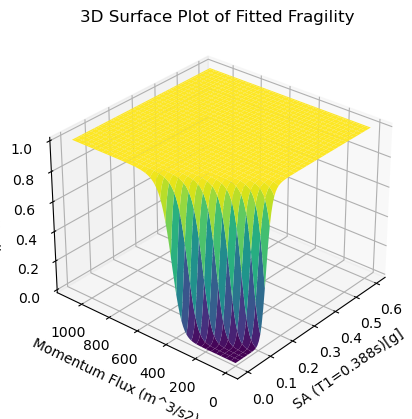

0.9994955384353088
0.2123735022972295
462.7721246529974
0.5040314205237558
8.884302152437977


C:\Users\mharati\AppData\Local\Temp\ipykernel_5988\2302354104.py:99: RuntimeWarning: invalid value encountered in power
  return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)


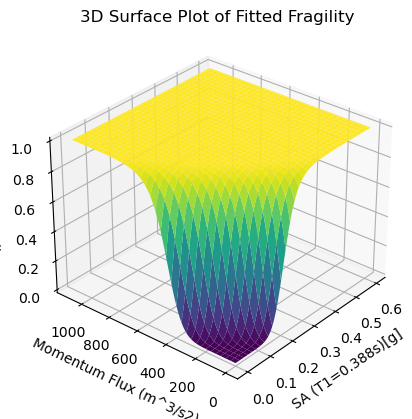

0.9994955384353088
0.35298244380477284
618.5009897152846
0.6294685865351152
7.089772344198725


C:\Users\mharati\AppData\Local\Temp\ipykernel_5988\2302354104.py:175: RuntimeWarning: invalid value encountered in power
  return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)


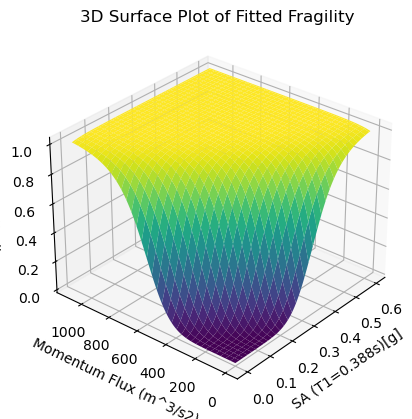

In [62]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


# Define your fragility function
def fragility_function(data, Emax, IC50A, IC50B, alpha, n):
    CA, CB = data  # Unpack the data
    return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)


# Specify the number of elements you want for x and y
num_elements = 500  # Adjust as needed



# Define the ranges for x and y with an equal number of elements
x_range = np.linspace(0.001, 0.6, num_elements)
y_range = np.linspace(0.001, 1100, num_elements)

FileName= 'FinalResult.txt' # This is the fragility matrix in paper of Harati and van de Lindt published in Engineering Structures (2024)
# Load your data from a CSV file, skipping the header row
data = np.genfromtxt(FileName, delimiter=' ', skip_header=0)

# Extract x, y, and f(x, y) values from the data
xraw = data[:, 0]
yraw = data[:, 1]
praw = data[:, 2]

# Define initial parameters for the fit
Emax = 1.01
IC50A = 0.0089
IC50B = 0.706
alpha = 1.0
n = 0.746

initial_params = [Emax, IC50A, IC50B, alpha, n]

# Fit the function to the data
params, _ = curve_fit(fragility_function, (xraw, yraw), praw, p0=initial_params, absolute_sigma=True)

# Extract the fitted parameters
Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit = params



# Create a grid of data for plotting
SA = np.linspace(0, max(x_range), 101)
Moment = np.linspace(0, max(y_range), 101)

X, Y = np.meshgrid(SA, Moment)
data_for_plot = (X, Y)
alpha_fit=abs(alpha_fit)


# Calculate the Z values for the fitted parameters
Z_fit = fragility_function(data_for_plot, Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit)

data_array = np.array(Z_fit)

# Find the maximum value excluding NaN elements
max_value_excluding_nans = np.nanmax(data_array)

# Print the fitted parameters
#print(Z_fit)
#max_abs_value = np.max(np.abs(Z_fit))
#print (max_value_excluding_nans)
print((1/max_value_excluding_nans))



print(IC50A_fit)
print(IC50B_fit)
print(abs(alpha_fit))
print(n_fit)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_fit, cmap='viridis')
ax.set_xlabel('SA (T1=0.388s)[g]')
ax.set_ylabel('Momentum Flux (m^3/s2)')
ax.set_zlabel('Z (Fitted)')
ax.set_title('3D Surface Plot of Fitted Fragility')
ax.view_init(elev=30, azim=-140)

plt.show()

#...............................................................................................




# Define your fragility function
def fragility_function(data, Emax, IC50A, IC50B, alpha, n):
    CA, CB = data  # Unpack the data
    return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)





# Load your data from a CSV file, skipping the header row
data = np.genfromtxt(FileName, delimiter=' ', skip_header=0)

# Extract x, y, and f(x, y) values from the data
xraw = data[:, 0]
yraw = data[:, 1]
praw = data[:, 3]

# Define initial parameters for the fit
Emax = 1.01
IC50A = 0.0089
IC50B = 0.706
alpha = 1.0
n = 0.746

initial_params = [Emax, IC50A, IC50B, alpha, n]

# Fit the function to the data
params, _ = curve_fit(fragility_function, (xraw, yraw), praw, p0=initial_params, absolute_sigma=True)

# Extract the fitted parameters
Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit = params



# Create a grid of data for plotting
SA = np.linspace(0, max(x_range), 101)
Moment = np.linspace(0, max(y_range), 101)

X, Y = np.meshgrid(SA, Moment)
data_for_plot = (X, Y)
alpha_fit=abs(alpha_fit)


# Calculate the Z values for the fitted parameters
Z_fit = fragility_function(data_for_plot, Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit)

# Print the fitted parameters
# Find the maximum value excluding NaN elements
max_value_excluding_nans = np.nanmax(data_array)

# Print the fitted parameters
#print(Z_fit)
#max_abs_value = np.max(np.abs(Z_fit))
#print (max_value_excluding_nans)
print((1/max_value_excluding_nans))
print(IC50A_fit)
print(IC50B_fit)
print(abs(alpha_fit))
print(n_fit)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_fit, cmap='viridis')
ax.set_xlabel('SA (T1=0.388s)[g]')
ax.set_ylabel('Momentum Flux (m^3/s2)')
ax.set_zlabel('Z (Fitted)')
ax.set_title('3D Surface Plot of Fitted Fragility')
ax.view_init(elev=30, azim=-140)

plt.show()

#............................................................................................



# Define your fragility function
def fragility_function(data, Emax, IC50A, IC50B, alpha, n):
    CA, CB = data  # Unpack the data
    return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)





# Load your data from a CSV file, skipping the header row
data = np.genfromtxt(FileName, delimiter=' ', skip_header=0)

# Extract x, y, and f(x, y) values from the data
xraw = data[:, 0]
yraw = data[:, 1]
praw = data[:, 4]

# Define initial parameters for the fit
Emax = 1.01
IC50A = 0.0089
IC50B = 0.706
alpha = 1.0
n = 0.746

initial_params = [Emax, IC50A, IC50B, alpha, n]

# Fit the function to the data
params, _ = curve_fit(fragility_function, (xraw, yraw), praw, p0=initial_params, absolute_sigma=True)

# Extract the fitted parameters
Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit = params



# Create a grid of data for plotting
SA = np.linspace(0, max(x_range), 101)
Moment = np.linspace(0, max(y_range), 101)

X, Y = np.meshgrid(SA, Moment)
data_for_plot = (X, Y)

alpha_fit=abs(alpha_fit)

# Calculate the Z values for the fitted parameters
Z_fit = fragility_function(data_for_plot, Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit)

# Print the fitted parameters
# Find the maximum value excluding NaN elements
max_value_excluding_nans = np.nanmax(data_array)

# Print the fitted parameters
#print(Z_fit)
#max_abs_value = np.max(np.abs(Z_fit))
#print (max_value_excluding_nans)
print((1/max_value_excluding_nans))
print(IC50A_fit)
print(IC50B_fit)
print(abs(alpha_fit))
print(n_fit)

# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_fit, cmap='viridis')
ax.set_xlabel('SA (T1=0.388s)[g]')
ax.set_ylabel('Momentum Flux (m^3/s2)')
ax.set_zlabel('Z (Fitted)')
ax.set_title('3D Surface Plot of Fitted Fragility')
ax.view_init(elev=30, azim=-140)

plt.show()


C:\Users\mharati\AppData\Local\Temp\ipykernel_5988\200504635.py:8: RuntimeWarning: invalid value encountered in power
  return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)


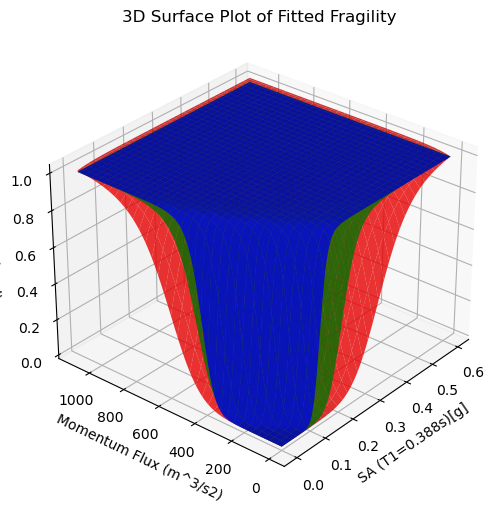

In [63]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def fragility_function(data, Emax, IC50A, IC50B, alpha, n):
    CA, CB = data  # Unpack the data
    return Emax * (CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n / ((CA / IC50A + CB / IC50B + alpha * (CA / IC50A) * (CB / IC50B))**n + 1)

# Specify the number of elements you want for x and y


# Create a grid of data for plotting
SA = np.linspace(0, max(x_range), 101)
Moment = np.linspace(0, max(y_range), 101)
X, Y = np.meshgrid(SA, Moment)

# Load your data from a text file, skipping the header row
data = np.genfromtxt(FileName, delimiter=' ', skip_header=0)

# Define initial parameters for the fit
Emax = 1.01
IC50A = 0.0089
IC50B = 0.706
alpha = 1.0
n = 0.746
initial_params = [Emax, IC50A, IC50B, alpha, n]

# Create a single 3D plot
fig = plt.figure(figsize=(8, 6))  # Adjust the size as needed
ax = fig.add_subplot(111, projection='3d')

# Define an offset for the Z values
offset = 0  # Adjust as needed

# Define colors for each surface
colors = ['blue', 'green', 'red']

# Loop to plot each surface
for i in range(3):
    # Extract x, y, and f(x, y) values from the data
    xraw = data[:, 0]
    yraw = data[:, 1]
    praw = data[:, 2 + i]

    # Fit the function to the data
    params, _ = curve_fit(fragility_function, (xraw, yraw), praw, p0=initial_params, absolute_sigma=True)

    Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit = params
    
    alpha_fit=abs(alpha_fit)


    # Calculate the Z values for the fitted parameters
    Z_fit = Z_fit = fragility_function(data_for_plot, Emax_fit, IC50A_fit, IC50B_fit, alpha_fit, n_fit) + i * offset

    # Plot the surface with specified color
    ax.plot_surface(X, Y, Z_fit, color=colors[i], alpha=0.8)

# Set labels and title
ax.set_xlabel('SA (T1=0.388s)[g]')
ax.set_ylabel('Momentum Flux (m^3/s2)')
ax.set_zlabel('Z (Fitted)')
ax.set_title('3D Surface Plot of Fitted Fragility')
ax.view_init(elev=30, azim=-140)

plt.show()
